# Introduction

### Section 1:

- What is regression?
- What is data?
- Where to look for data?
- Libraries
- Data at a glance

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

A dataset can be thought as a matrix where each row represents a record (vector) and each column represents a feature

![matrix](matrix-1.png)

notes:
no data dictionary present
assumptions:
- id - unique id for house
- price - price of the house
- bedrooms - number of bedrooms in the house
- bathroom - number of bathrooms in the house
- sqft_living - sqft the house itself is in the land
- sqft_lot - sqft of othe house as a whole
- waterfront - (binary) any waterfront property
- view - (binary) does house has a view
- grade - structural quality of the house

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print(df.shape)
print(df.columns)

(21613, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
#df = df.dropna()
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Section 2

- Exploring and visualizing data 

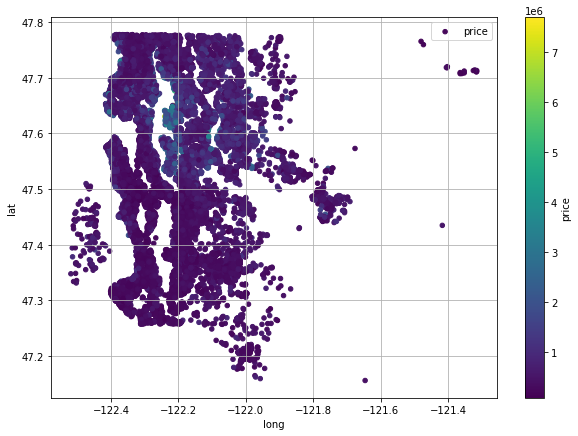

In [6]:
df.plot(kind="scatter", x="long", y="lat", grid=True,
             label="price",
             c="price", cmap="viridis", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
#save_fig("housing_prices_scatterplot")  # extra code
plt.show()

In [7]:
#for the sake of simplicity lets drop a few features
todrop = ['sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15','id']

# Drop the specified columns
df.drop(columns=todrop, inplace=True)

# Verify the resulting DataFrame
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,98178,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,98125,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,98028,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,98136,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,98074,47.6168,-122.045


In [46]:
import seaborn as sns
# https://seaborn.pydata.org/api.html
# refer to link for furthur details about seaborn plots

columns_for_use = ['yr_built','price','bedrooms', 'bathrooms', 'sqft_living', 'floors','grade','sqft_lot']

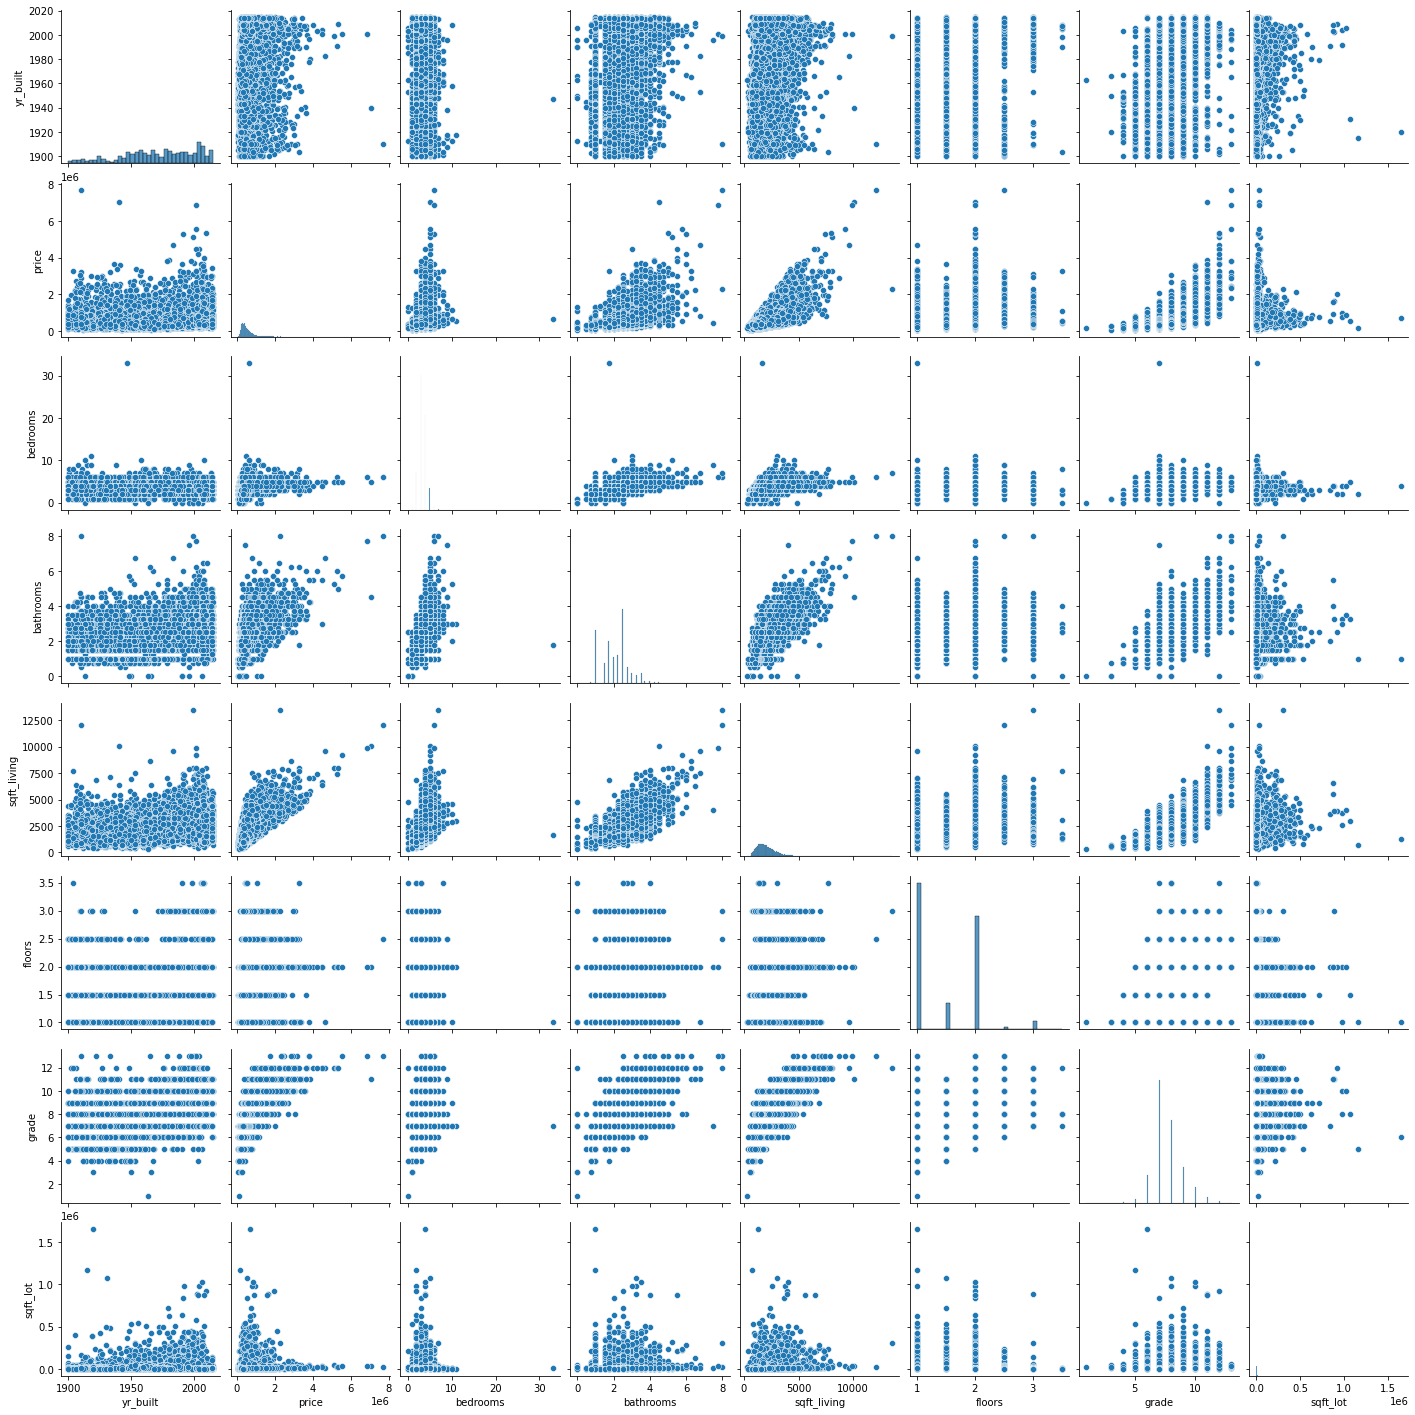

In [9]:
sns.pairplot(df[columns_for_use]);

Goal to look for any feature that might have multicollinearity

In [10]:
corr_matrix = df[columns_for_use].corr()
corr_matrix

,yr_built,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_lot
yr_built,1.000000,0.054012,0.154178,0.506019,0.318049,0.489319,0.446963,0.053080
price,0.054012,1.000000,0.308350,0.525138,0.702035,0.256794,0.667434,0.089661
bedrooms,0.154178,0.308350,1.000000,0.515884,0.576671,0.175429,0.356967,0.031703
bathrooms,0.506019,0.525138,0.515884,1.000000,0.754665,0.500653,0.664983,0.087740
sqft_living,0.318049,0.702035,0.576671,0.754665,1.000000,0.353949,0.762704,0.172826
floors,0.489319,0.256794,0.175429,0.500653,0.353949,1.000000,0.458183,-0.005201
grade,0.446963,0.667434,0.356967,0.664983,0.762704,0.458183,1.000000,0.113621
sqft_lot,0.053080,0.089661,0.031703,0.087740,0.172826,-0.005201,0.113621,1.000000


In [11]:
corr_matrix["price"].sort_values(ascending=False)

price          1.000000
sqft_living    0.702035
grade          0.667434
bathrooms      0.525138
bedrooms       0.308350
floors         0.256794
sqft_lot       0.089661
yr_built       0.054012
Name: price, dtype: float64

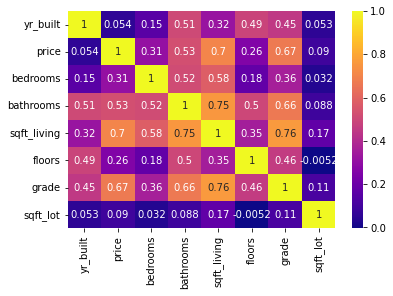

In [12]:
sns.heatmap(corr_matrix, annot=True, cmap="plasma")
plt.show()

In [13]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,540088.14177,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1971.00514,98077.93980,47.56005,-122.21390
std,367127.19648,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,29.37341,53.50503,0.13856,0.14083
min,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1900.00000,98001.00000,47.15590,-122.51900
25%,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1951.00000,98033.00000,47.47100,-122.32800
50%,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1975.00000,98065.00000,47.57180,-122.23000
75%,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,1997.00000,98118.00000,47.67800,-122.12500
max,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,2015.00000,98199.00000,47.77760,-121.31500


For other exploratory analysis, can look utilize a box plot for outlier detection or a histogram of each column for frequence

In [ ]:
# Other functionss in pandas
# https://pandas.pydata.org/docs/
# refer to link for futhur details about pandas functions

df['price'].max()
df['price'].min()
df['price'].mean()
df['price'].medium()
df['price'].std()
df['price'].count()


df.index() # retrieve index of a variable 

df.iloc[0] #refer row by index
df.loc['r'] #refer to row by label

#iterate through a index of a row
for price in df['price']:
    print(price)

### Section 3

- Partitioning Data
- Understanding the functions in sklearn
- Metric vs Loss
- Supervised vs Unsupervised
- Overfitting and Underfitting
- K-Fold

![training2](training2.png)

In [88]:
from sklearn.model_selection import train_test_split

#uses arrays double [] to put columns in a array 
X = df[['sqft_living']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

![standardize](OIP.jpg)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

![methods](methods.png)

- fit, storing instances of train data
- predict, function to perform algorithm on model
- set_params, manually setting parameters 
- get_params, retriving the parameters used

![tradeoff](tradeoff.png)

### Section 4

![formula](regress_formula.jpg)

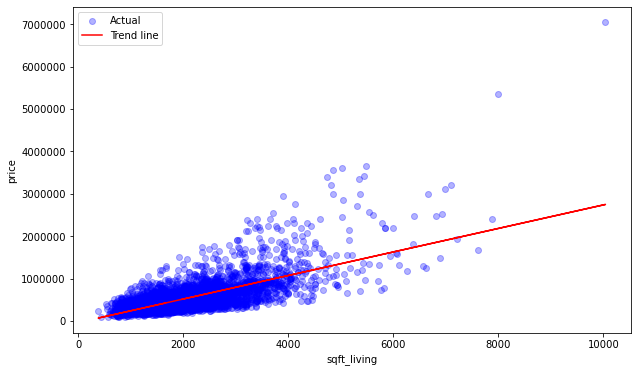

In [89]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Train the model
model_slm = LinearRegression() #OLS
model_slm.fit(X_train, y_train)

# Predict on test data
y_pred = model_slm.predict(X_test)

X_test_array = X_test['sqft_living'].values

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_array, y_test, color='b', alpha=0.3, label='Actual')
plt.plot(X_test_array, y_pred, color='r', label='Trend line')
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

In [90]:
coef = model_slm.coef_[0]
intercept = model_slm.intercept_

print(f"Equation of the trendline: y = {coef:.3}x + {intercept:.3}")

Equation of the trendline: y = 2.78e+02x + -3.9e+04


##### Metrics and Loss

![loss](modified.png)

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [91]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("R^2 score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

R^2 score:  0.4891139430408491
MAE:  179565.78795896727
MSE:  76895701635.9208


##### Residuals

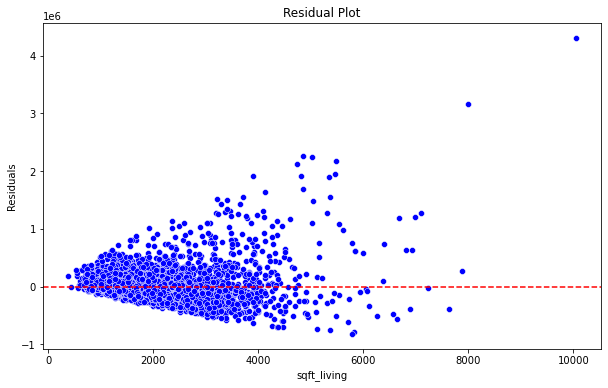

In [92]:
y_test_array = y_test.to_numpy()
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))  # Define figure size
sns.scatterplot(x=X_test_array, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('sqft_living')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Residual plot tells us about the goodness of fit for the model (how well the model perform):
   - Closer to 0 the better
   - If there is homoscedasticity or hetroscedasticity 
   - A pattern
   - Outliers

###### Using statmodel

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS

In [93]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

#define response variable
y = df['price']

#define explanatory variable
x = df[['sqft_living']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

est = smf.ols('price ~ sqft_living', df).fit()
est.summary().tables[1]

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        05:07:04   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-4.358e+04,4402.690,-9.899,0.000,-5.22e+04,-3.5e+04
sqft_living,280.6236,1.936,144.920,0.000,276.828,284.419


##### Stochastic Gradient Descent

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor

In [96]:
from sklearn.linear_model import SGDRegressor

# Initialize the SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Train the model
sgd_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = sgd_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.3309177083824024e+30


K-fold or AutoMl for parameters

https://www.statology.org/k-fold-cross-validation-in-python/

### Section 5

In [83]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame containing the dataset
X = df[['bathrooms', 'bedrooms','grade', 'sqft_living']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model2 = LinearRegression() 
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test) 

print("Intercept: ", model2.intercept_)
print("Coefficients: ", model2.coef_)

print('mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Intercept:  -479715.92129755556
Coefficients:  [-23776.17771999 -37712.91009103  96111.35897215    221.03704933]
mean_squared_error :  69872956091.81422
mean_absolute_error :  167291.50231866198
R-squared: 0.5357722438785653


In [86]:
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                          3.033e+04
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                        0.00
Time:                        04:55:32   Log-Likelihood:                     -2.9964e+05
No. Observations:               21613   AIC:                                  5.993e+05
Df Residuals:                   21609   BIC:                                  5.993e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [87]:
est = smf.ols('price ~ sqft_living + bathrooms + grade + bedrooms', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-4.784e+05,1.49e+04,-32.121,0.000,-5.08e+05,-4.49e+05
sqft_living,226.6532,3.577,63.362,0.000,219.642,233.665
bathrooms,-2.674e+04,3480.127,-7.683,0.000,-3.36e+04,-1.99e+04
grade,9.614e+04,2315.488,41.520,0.000,9.16e+04,1.01e+05
bedrooms,-3.931e+04,2290.774,-17.158,0.000,-4.38e+04,-3.48e+04


In [ ]:
from sklearn.linear_model import SGDRegressor

# Initialize the SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Train the model
sgd_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = sgd_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)